In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import glob

path = "Flight data/*_2016.csv"
frame=pd.DataFrame()
df_list=[]

for fname in glob.glob(path):
    df=pd.read_csv(fname,index_col=None, header=0)
    df_list.append(df)
frame = pd.concat(df_list)    
frame.AIRLINE_ID.count() 

1839391

In [2]:
df=DataFrame(frame, columns=['DEST_CITY_NAME', 'CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'])
df['CARRIER_DELAY']=df['CARRIER_DELAY'].fillna(0)
df['WEATHER_DELAY']=df['WEATHER_DELAY'].fillna(0)
df['NAS_DELAY']=df['NAS_DELAY'].fillna(0)
df['SECURITY_DELAY']=df['SECURITY_DELAY'].fillna(0)
df['LATE_AIRCRAFT_DELAY']=df['LATE_AIRCRAFT_DELAY'].fillna(0)
df['CARRIER_DELAY'] = df['CARRIER_DELAY'].apply(lambda x: 0 if x==0 else 1)
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].apply(lambda x: 0 if x==0 else 1)
df['NAS_DELAY'] = df['NAS_DELAY'].apply(lambda x: 0 if x==0 else 1)
df['SECURITY_DELAY'] = df['SECURITY_DELAY'].apply(lambda x: 0 if x==0 else 1)
df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].apply(lambda x: 0 if x==0 else 1)
df.to_csv("in.csv")

In [4]:
out=DataFrame(df.groupby(['DEST_CITY_NAME'])[['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']].sum())
out=out.reset_index()
out=out.sort_values(by='CARRIER_DELAY',ascending=False)
out.head(n=20).to_csv("analysis1.csv",columns=['DEST_CITY_NAME','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'])


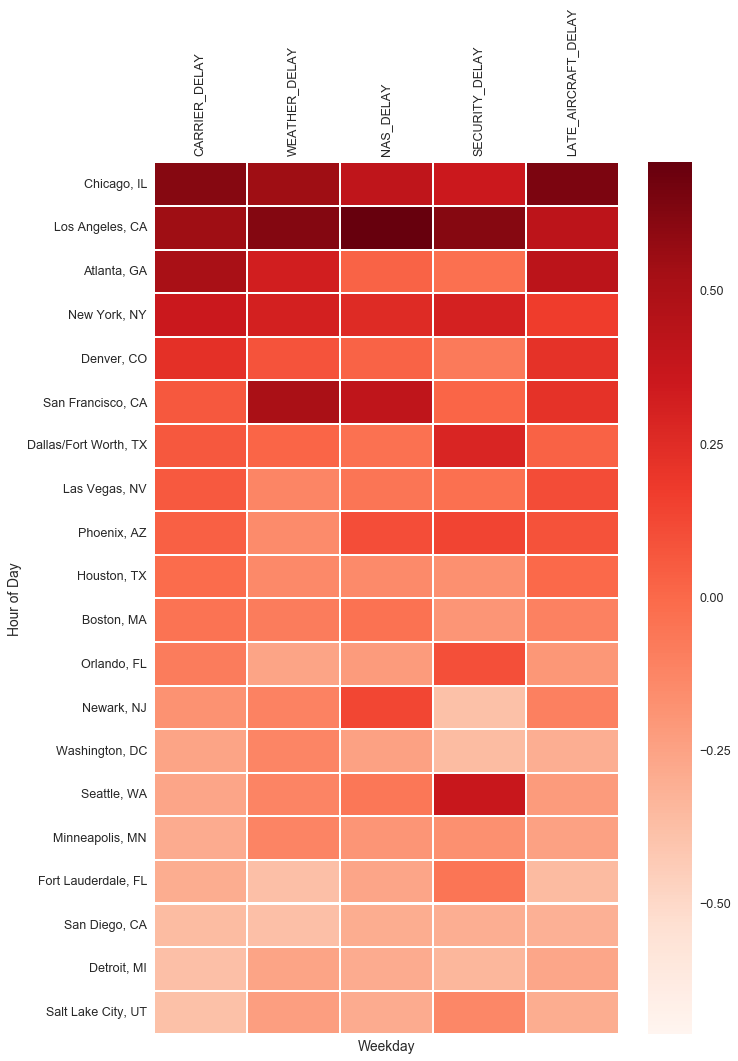

In [6]:
## Graph Analysis for Number of delays

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import the data directly into a pandas dataframe
nba = pd.read_csv("analysis1.csv", index_col='DEST_CITY_NAME')
# remove index title
nba.index.name = ""
# normalize data columns
nba_norm = (nba - nba.mean()) / (nba.max() - nba.min())
# relabel columns
labels = ['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']
nba_norm.columns = labels
# set appropriate font and dpi
sns.set(font_scale=1.2)
sns.set_style({"savefig.dpi": 75})
sns.set
# plot it out
ax = sns.heatmap(nba_norm, cmap=plt.cm.Reds, linewidths=1)
# set the x-axis labels on the top
ax.xaxis.tick_top()
ax.set(xlabel='Weekday', ylabel='Hour of Day')
# rotate the x-axis labels
plt.xticks(rotation=90)
# get figure (usually obtained via "fig,ax=plt.subplots()" with matplotlib)
fig = ax.get_figure()
# specify dimensions and save
fig.set_size_inches(10, 15)
fig.savefig("nba.png")